<a href="https://colab.research.google.com/github/araara243/meowtwo/blob/main/Balance_Scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import tensorflow
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
#helper library
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
#https://archive.ics.uci.edu/dataset/12/balance+scale
balance_scale = pd.read_csv('balance-scale.data.csv')

In [ ]:
display(balance_scale)

,class,left-weight,left-distance,right-weight,right-distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [ ]:
balance_scale.describe()

,left-weight,left-distance,right-weight,right-distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [ ]:
balance_scale.loc[balance_scale['class'] == 'R', 'class'] = 0
balance_scale.loc[balance_scale['class'] == 'B', 'class'] = 1
balance_scale.loc[balance_scale['class'] == 'L', 'class'] = 2

In [ ]:
display(balance_scale)

,class,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1,1
1,0,1,1,1,2
2,0,1,1,1,3
3,0,1,1,1,4
4,0,1,1,1,5
...,...,...,...,...,...
620,2,5,5,5,1
621,2,5,5,5,2
622,2,5,5,5,3
623,2,5,5,5,4


In [ ]:
balance_scale.isnull().sum()

class             0
left-weight       0
left-distance     0
right-weight      0
right-distance    0
dtype: int64

In [ ]:
balance_scale.shape

(625, 5)

In [ ]:
duplicates = balance_scale[balance_scale.duplicated()]
duplicates

,class,left-weight,left-distance,right-weight,right-distance


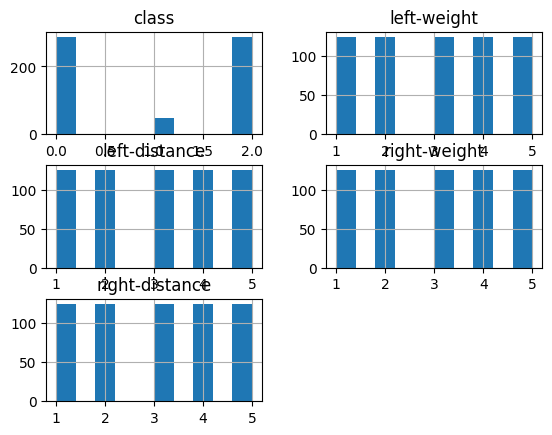

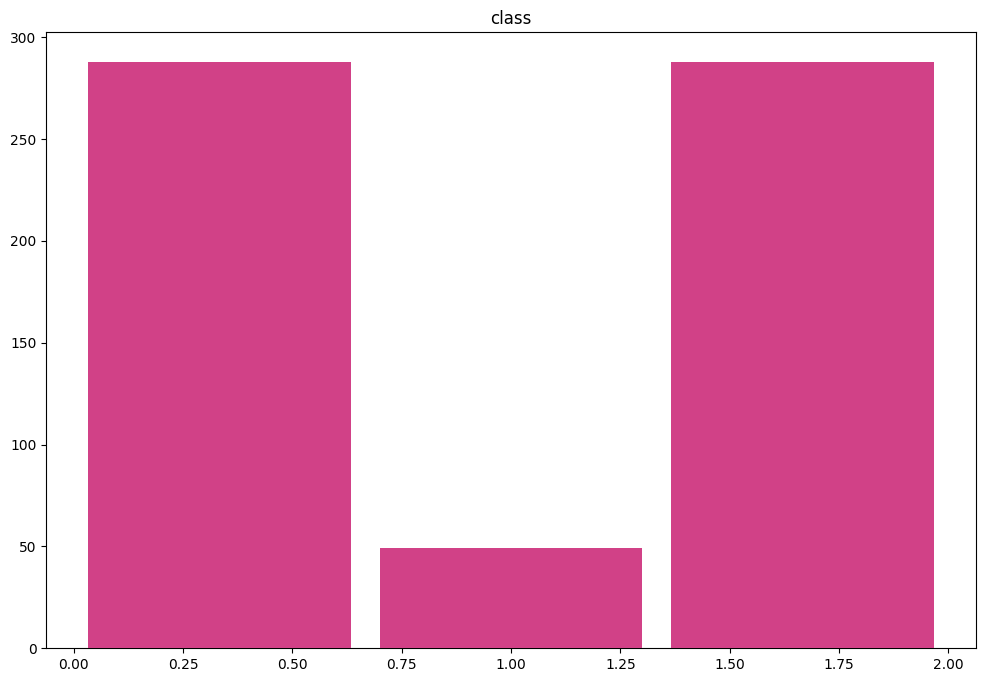

In [ ]:
# Convert the 'class' column to a numerical or datetime type if it isn't already.
# For example, if 'class' represents categories, you can use:
balance_scale['class'] = balance_scale['class'].astype('category').cat.codes

# Then, proceed with creating the histogram:
balance_scale.hist()
ax = balance_scale.hist(column='class', bins=3, grid=False, figsize=(12,8), color='#D14187', zorder=3, rwidth=0.9)

<Axes: >

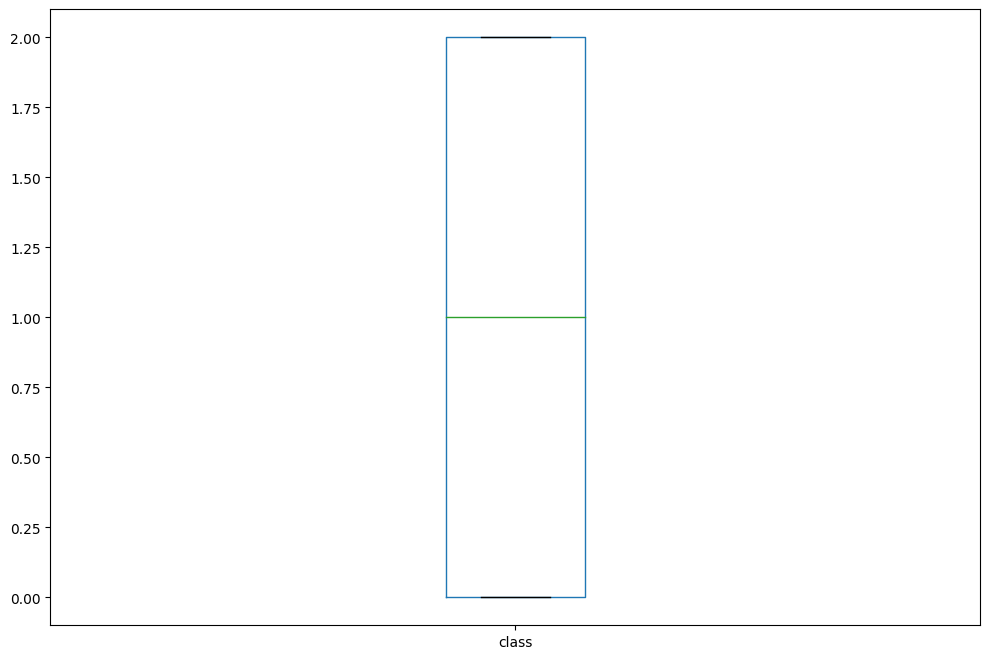

In [ ]:
balance_scale.boxplot(column='class', grid=False, figsize=(12,8))

<Axes: >

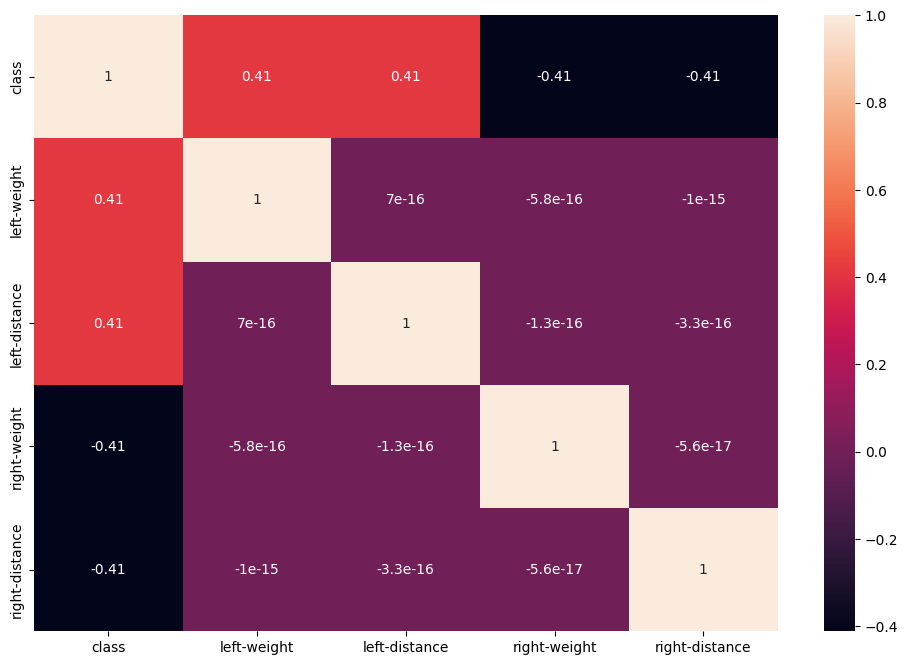

In [ ]:
fig, ax=plt.subplots(figsize=(12,8))
sb.heatmap(balance_scale.corr(), annot=True, ax=ax)

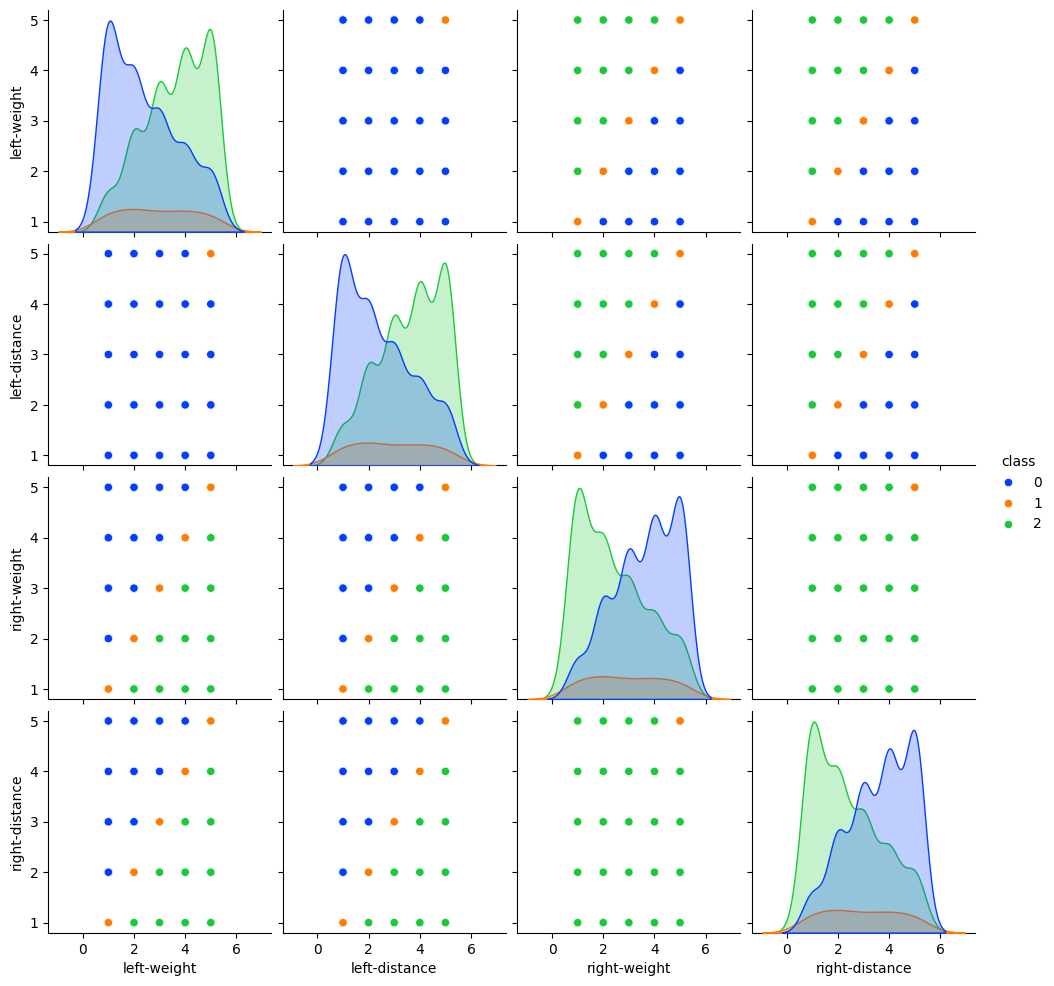

In [ ]:
sb.pairplot(balance_scale, hue='class', palette='bright')

In [ ]:
balance_scale_input= balance_scale[['left-weight','left-distance','right-weight',	'right-distance']].copy()
balance_scale_output= balance_scale['class'].copy()

In [ ]:
display(balance_scale_output)

0      1
1      0
2      0
3      0
4      0
      ..
620    2
621    2
622    2
623    2
624    1
Name: class, Length: 625, dtype: int8

In [ ]:
balance_scale_output.describe()

count    625.000000
mean       1.000000
std        0.960769
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: class, dtype: float64

In [ ]:
balance_scale_input_numpy = balance_scale_input.to_numpy()
balance_scale_output_numpy = balance_scale_output.to_numpy()

In [ ]:
balance_scale_input_numpy = np.asarray(balance_scale_input_numpy).astype('float32')
balance_scale_output_numpy = np.asarray(balance_scale_output_numpy).astype('float32')

In [ ]:
print(len(balance_scale_input_numpy))

625


In [ ]:
balance_scale_output_numpy

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 2., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       2., 1., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 2., 2., 2., 1., 0., 2., 1., 0., 0., 0.,
       2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2.,
       2., 2., 1., 2., 2., 0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 2., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2.,
       1., 0., 2., 1., 0., 0., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 1., 0., 0., 2., 1.,
       0., 0., 0., 2., 0., 0., 0., 0., 2., 0., 0., 0., 0., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 0., 2., 2., 0., 0., 0., 2., 1., 0., 0., 0., 2.,
       0., 0., 0., 0., 2.

In [ ]:
#split the data into test and training set
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(balance_scale_input_numpy, balance_scale_output_numpy, test_size=0.2, random_state=42)

# Verify the shapes of the resulting arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (500, 4)
X_test shape: (125, 4)
y_train shape: (500,)
y_test shape: (125,)


In [ ]:
X_train

array([[5., 1., 3., 5.],
       [4., 4., 4., 5.],
       [1., 1., 2., 2.],
       ...,
       [3., 1., 5., 1.],
       [4., 3., 3., 1.],
       [1., 5., 1., 3.]], dtype=float32)

In [ ]:
X_test

array([[4., 3., 5., 3.],
       [4., 5., 3., 1.],
       [2., 4., 4., 1.],
       [2., 4., 3., 3.],
       [4., 5., 2., 1.],
       [5., 1., 4., 1.],
       [2., 2., 3., 4.],
       [1., 4., 1., 3.],
       [5., 2., 1., 3.],
       [2., 1., 5., 1.],
       [3., 1., 4., 1.],
       [1., 2., 2., 2.],
       [1., 3., 2., 1.],
       [1., 4., 4., 1.],
       [5., 3., 2., 3.],
       [1., 4., 1., 2.],
       [1., 1., 1., 3.],
       [3., 5., 4., 4.],
       [4., 1., 5., 1.],
       [3., 2., 3., 2.],
       [2., 1., 2., 2.],
       [2., 1., 5., 4.],
       [1., 2., 5., 5.],
       [5., 5., 5., 2.],
       [4., 3., 3., 3.],
       [1., 5., 3., 1.],
       [3., 1., 2., 3.],
       [5., 4., 1., 4.],
       [5., 5., 5., 1.],
       [3., 1., 2., 2.],
       [3., 4., 2., 5.],
       [3., 1., 3., 2.],
       [2., 3., 2., 5.],
       [5., 3., 1., 5.],
       [2., 1., 2., 3.],
       [4., 5., 3., 3.],
       [3., 4., 3., 1.],
       [5., 5., 3., 3.],
       [2., 3., 2., 2.],
       [5., 4., 5., 5.],


In [ ]:
y_train

array([0., 0., 0., 1., 0., 2., 2., 1., 0., 2., 2., 2., 0., 2., 2., 2., 0.,
       0., 0., 2., 0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 1., 2., 1.,
       2., 2., 0., 0., 2., 2., 2., 0., 2., 0., 1., 2., 0., 0., 0., 1., 2.,
       2., 2., 0., 2., 0., 1., 2., 0., 0., 0., 0., 2., 2., 0., 0., 0., 1.,
       2., 0., 1., 2., 2., 0., 2., 2., 2., 0., 2., 0., 0., 1., 0., 0., 0.,
       2., 0., 0., 0., 0., 2., 2., 2., 0., 2., 2., 0., 0., 0., 0., 0., 0.,
       2., 0., 0., 2., 1., 0., 2., 1., 0., 0., 0., 2., 2., 1., 2., 0., 0.,
       2., 0., 2., 2., 0., 2., 0., 0., 2., 2., 2., 2., 2., 2., 0., 2., 0.,
       0., 0., 2., 2., 2., 0., 2., 2., 0., 2., 0., 0., 1., 2., 0., 0., 0.,
       0., 0., 2., 0., 2., 2., 2., 2., 2., 2., 0., 2., 0., 2., 2., 2., 2.,
       1., 0., 0., 0., 0., 2., 0., 0., 2., 0., 0., 2., 2., 2., 0., 2., 2.,
       2., 1., 0., 0., 2., 2., 0., 0., 2., 1., 2., 0., 2., 0., 2., 2., 2.,
       2., 0., 2., 0., 2., 0., 0., 0., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       2., 2., 0., 0., 0.

In [ ]:
y_test

array([0., 2., 2., 0., 2., 2., 0., 2., 2., 0., 0., 0., 2., 1., 2., 2., 0.,
       0., 0., 1., 0., 0., 0., 2., 2., 2., 0., 2., 2., 0., 2., 0., 0., 2.,
       0., 2., 2., 2., 2., 0., 1., 0., 0., 2., 0., 1., 1., 0., 1., 0., 2.,
       2., 0., 0., 2., 2., 0., 2., 2., 1., 2., 2., 0., 0., 2., 2., 0., 0.,
       2., 2., 0., 0., 0., 0., 0., 2., 2., 0., 2., 0., 0., 1., 0., 2., 0.,
       1., 2., 2., 0., 2., 2., 2., 0., 2., 2., 0., 0., 0., 0., 0., 2., 1.,
       0., 0., 2., 1., 2., 0., 0., 2., 0., 2., 0., 0., 2., 0., 2., 2., 2.,
       2., 0., 0., 2., 0., 0.], dtype=float32)

In [ ]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(random_state = 0)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
clf.predict(X_test)

array([1., 2., 2., 0., 2., 1., 0., 1., 2., 0., 0., 0., 2., 0., 2., 2., 0.,
       2., 1., 2., 1., 0., 0., 2., 2., 2., 1., 2., 2., 2., 2., 0., 0., 2.,
       0., 2., 2., 2., 1., 1., 2., 0., 0., 2., 0., 2., 2., 0., 0., 0., 2.,
       2., 0., 0., 2., 2., 2., 0., 2., 0., 2., 2., 0., 0., 2., 2., 0., 0.,
       2., 2., 0., 0., 0., 0., 0., 2., 2., 0., 2., 0., 1., 2., 0., 2., 1.,
       2., 2., 0., 0., 2., 2., 2., 0., 2., 2., 0., 0., 0., 0., 0., 2., 2.,
       1., 0., 2., 2., 2., 0., 0., 2., 0., 1., 0., 0., 2., 0., 2., 2., 2.,
       1., 1., 0., 2., 2., 0.], dtype=float32)

In [ ]:
#Original
#model00 architecture is using sigmoid activation
model00 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model00.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history00 = model00.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model00.evaluate(X_test,  y_test)

test_loss, test_acc = model00.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 3ms/step - loss: 0.8670 - accuracy: 0.6000 - val_loss: 0.8069 - val_accuracy: 0.8300
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5775 - accuracy: 0.8500 - val_loss: 0.5321 - val_accuracy: 0.8600
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3919 - accuracy: 0.8850 - val_loss: 0.4078 - val_accuracy: 0.8500
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3319 - accuracy: 0.8875 - val_loss: 0.3781 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.8900 - val_loss: 0.3302 - val_accuracy: 0.8700
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2973 - accuracy: 0.8925 - val_loss: 0.3590 - val_accuracy: 0.8600
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2868 - accuracy: 0.8950 - val_loss: 0.2958 - val_accuracy: 0.8800
Epoch 

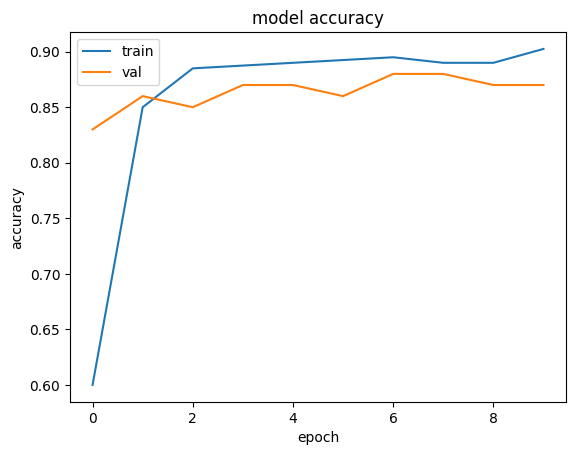

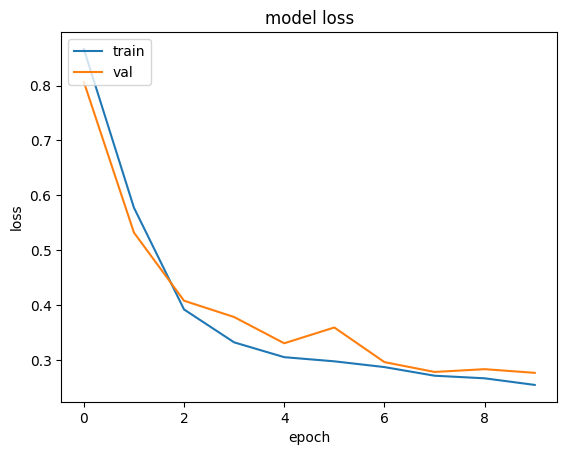

In [ ]:
# summarize history for accuracy
plt.plot(history00.history['accuracy'])
plt.plot(history00.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history00.history['loss'])
plt.plot(history00.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(model00.optimizer.learning_rate)


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [ ]:
#ACTIVATION FUNCTION TEST

In [ ]:
#Experiment 1
#model01 architecture is using sigmoid activation
model01 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(20, activation='tanh'),

  tf.keras.layers.Dense(3)
])
model01.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history01 = model01.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model01.evaluate(X_test,  y_test)

test_loss, test_acc = model01.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 4ms/step - loss: 0.5448 - accuracy: 0.8250 - val_loss: 0.4082 - val_accuracy: 0.8700
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.8875 - val_loss: 0.3048 - val_accuracy: 0.8700
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2717 - accuracy: 0.8975 - val_loss: 0.3164 - val_accuracy: 0.8700
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2489 - accuracy: 0.9000 - val_loss: 0.2645 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2204 - accuracy: 0.9125 - val_loss: 0.2921 - val_accuracy: 0.8600
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2160 - accuracy: 0.9125 - val_loss: 0.2300 - val_accuracy: 0.8800
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.1927 - accuracy: 0.9225 - val_loss: 0.2787 - val_accuracy: 0.8600
Epoch 

In [ ]:
print(model01.optimizer.learning_rate)


<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [ ]:
model00.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4)                 0         
                                                                 
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 583 (2.28 KB)
Trainable params: 583 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model01.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_3 (Dense)             (None, 20)                100       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 3)                 63        
                                                                 
Total params: 583 (2.28 KB)
Trainable params: 583 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Experiment2
#model02 architecture is using ELU activation
model02 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='ELU'),
  tf.keras.layers.Dense(20, activation='ELU'),

  tf.keras.layers.Dense(3)
])
model02.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history02 = model02.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model02.evaluate(X_test,  y_test)

test_loss, test_acc = model02.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 2ms/step - loss: 0.6301 - accuracy: 0.7850 - val_loss: 0.4585 - val_accuracy: 0.8600
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 0.8950 - val_loss: 0.3193 - val_accuracy: 0.8700
Epoch 3/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3008 - accuracy: 0.8875 - val_loss: 0.2951 - val_accuracy: 0.8700
Epoch 4/10
400/400 [==============================] - 1s 4ms/step - loss: 0.2821 - accuracy: 0.8925 - val_loss: 0.2798 - val_accuracy: 0.8600
Epoch 5/10
400/400 [==============================] - 1s 3ms/step - loss: 0.2603 - accuracy: 0.8950 - val_loss: 0.2645 - val_accuracy: 0.8600
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2695 - accuracy: 0.8900 - val_loss: 0.2870 - val_accuracy: 0.8800
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2301 - accuracy: 0.9025 - val_loss: 0.2349 - val_accuracy: 0.9100
Epoch 

In [ ]:
#Experiment3
#model03 architecture is using relu activation
model03 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),

  tf.keras.layers.Dense(3)
])
model03.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history03 = model03.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model03.evaluate(X_test,  y_test)

test_loss, test_acc = model03.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 2ms/step - loss: 0.5987 - accuracy: 0.8300 - val_loss: 0.5223 - val_accuracy: 0.8800
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3659 - accuracy: 0.8875 - val_loss: 0.3751 - val_accuracy: 0.8700
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3056 - accuracy: 0.8950 - val_loss: 0.3227 - val_accuracy: 0.8800
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2846 - accuracy: 0.8975 - val_loss: 0.2951 - val_accuracy: 0.8800
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.8900 - val_loss: 0.2850 - val_accuracy: 0.8800
Epoch 6/10
400/400 [==============================] - 1s 3ms/step - loss: 0.2504 - accuracy: 0.9025 - val_loss: 0.2584 - val_accuracy: 0.8800
Epoch 7/10
400/400 [==============================] - 1s 3ms/step - loss: 0.2432 - accuracy: 0.8975 - val_loss: 0.2462 - val_accuracy: 0.8800
Epoch 

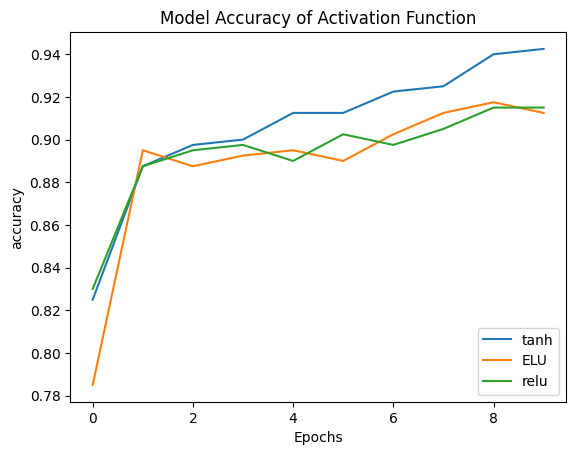

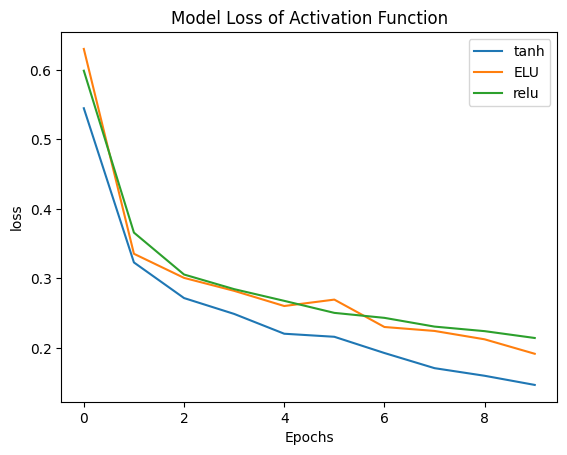

In [ ]:
# summarize history for accuracy
plt.plot(history01.history['accuracy'])
plt.plot(history02.history['accuracy'])
plt.plot(history03.history['accuracy'])
plt.title('Model Accuracy of Activation Function')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['tanh','ELU','relu'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history01.history['loss'])
plt.plot(history02.history['loss'])
plt.plot(history03.history['loss'])
plt.title('Model Loss of Activation Function')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['tanh','ELU','relu'], loc='upper right')
plt.show()

In [ ]:
#EPOCH TEST

In [ ]:
#Experiment4
#model04 architecture is using epoch = 10
model04 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model04.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history04 = model04.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model04.evaluate(X_test,  y_test)

test_loss, test_acc = model04.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 2ms/step - loss: 0.8979 - accuracy: 0.6425 - val_loss: 0.7659 - val_accuracy: 0.7700
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5681 - accuracy: 0.8575 - val_loss: 0.5802 - val_accuracy: 0.8500
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4237 - accuracy: 0.8775 - val_loss: 0.4519 - val_accuracy: 0.8600
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3584 - accuracy: 0.8900 - val_loss: 0.4094 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3140 - accuracy: 0.9075 - val_loss: 0.3995 - val_accuracy: 0.8600
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2977 - accuracy: 0.8950 - val_loss: 0.3203 - val_accuracy: 0.8700
Epoch 7/10
400/400 [==============================] - 1s 3ms/step - loss: 0.2851 - accuracy: 0.8975 - val_loss: 0.2923 - val_accuracy: 0.8800
Epoch 

In [ ]:
#Experiment5
#model05 architecture is using epoch = 20
model05 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model05.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history05 = model05.fit(X_train, y_train, epochs=20, batch_size=1, validation_split=0.2)
test_loss, test_acc = model05.evaluate(X_test,  y_test)

test_loss, test_acc = model05.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/20
400/400 [==============================] - 2s 2ms/step - loss: 0.7519 - accuracy: 0.7175 - val_loss: 0.6389 - val_accuracy: 0.8500
Epoch 2/20
400/400 [==============================] - 1s 2ms/step - loss: 0.4593 - accuracy: 0.8975 - val_loss: 0.4770 - val_accuracy: 0.8700
Epoch 3/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3620 - accuracy: 0.8975 - val_loss: 0.4097 - val_accuracy: 0.8600
Epoch 4/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3190 - accuracy: 0.8950 - val_loss: 0.3559 - val_accuracy: 0.8700
Epoch 5/20
400/400 [==============================] - 1s 2ms/step - loss: 0.2897 - accuracy: 0.9050 - val_loss: 0.3410 - val_accuracy: 0.8600
Epoch 6/20
400/400 [==============================] - 1s 3ms/step - loss: 0.2747 - accuracy: 0.8975 - val_loss: 0.3406 - val_accuracy: 0.8600
Epoch 7/20
400/400 [==============================] - 1s 2ms/step - loss: 0.2520 - accuracy: 0.9075 - val_loss: 0.3177 - val_accuracy: 0.8800
Epoch 

In [ ]:
#Experiment6
#model06 architecture is using epoch = 30
model06 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model06.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history06 = model06.fit(X_train, y_train, epochs=30, batch_size=1, validation_split=0.2)
test_loss, test_acc = model06.evaluate(X_test,  y_test)

test_loss, test_acc = model06.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/30
400/400 [==============================] - 2s 2ms/step - loss: 0.8349 - accuracy: 0.6650 - val_loss: 0.7005 - val_accuracy: 0.8400
Epoch 2/30
400/400 [==============================] - 1s 3ms/step - loss: 0.5173 - accuracy: 0.8675 - val_loss: 0.5163 - val_accuracy: 0.8600
Epoch 3/30
400/400 [==============================] - 1s 3ms/step - loss: 0.3999 - accuracy: 0.8825 - val_loss: 0.4104 - val_accuracy: 0.8800
Epoch 4/30
400/400 [==============================] - 1s 3ms/step - loss: 0.3385 - accuracy: 0.8925 - val_loss: 0.3698 - val_accuracy: 0.8700
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 0.3072 - accuracy: 0.8925 - val_loss: 0.3338 - val_accuracy: 0.8700
Epoch 6/30
400/400 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.9025 - val_loss: 0.3112 - val_accuracy: 0.8700
Epoch 7/30
400/400 [==============================] - 1s 2ms/step - loss: 0.2681 - accuracy: 0.9050 - val_loss: 0.2878 - val_accuracy: 0.8800
Epoch 

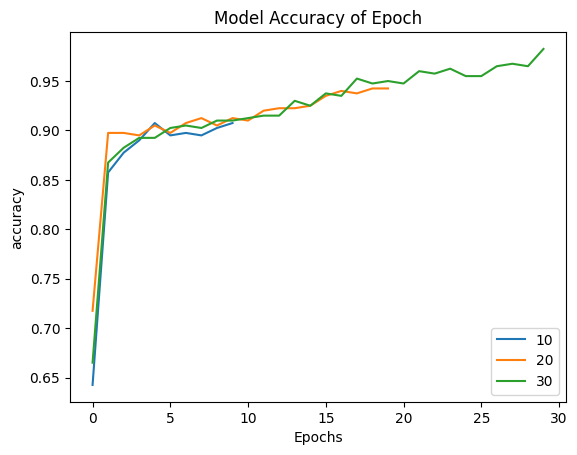

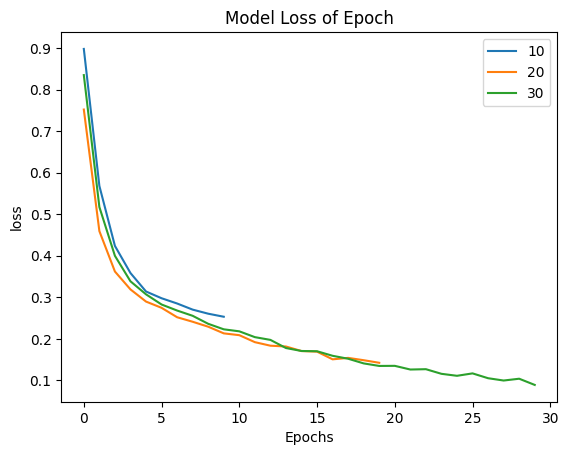

In [ ]:
# summarize history for accuracy
plt.plot(history04.history['accuracy'])
plt.plot(history05.history['accuracy'])
plt.plot(history06.history['accuracy'])
plt.title('Model Accuracy of Epoch')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['10','20','30'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history04.history['loss'])
plt.plot(history05.history['loss'])
plt.plot(history06.history['loss'])
plt.title('Model Loss of Epoch')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['10','20','30'], loc='upper right')
plt.show()

In [ ]:
#HIDDEN LAYER TEST

In [ ]:
#Experiment7
#model07 architecture is using hidden layer = 3
model07 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model07.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history07 = model07.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model07.evaluate(X_test,  y_test)

test_loss, test_acc = model07.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 4ms/step - loss: 0.8838 - accuracy: 0.6100 - val_loss: 0.8252 - val_accuracy: 0.7500
Epoch 2/10
400/400 [==============================] - 1s 4ms/step - loss: 0.5970 - accuracy: 0.8700 - val_loss: 0.5427 - val_accuracy: 0.8700
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4031 - accuracy: 0.8925 - val_loss: 0.4125 - val_accuracy: 0.8700
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3414 - accuracy: 0.8875 - val_loss: 0.3601 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3143 - accuracy: 0.8925 - val_loss: 0.3317 - val_accuracy: 0.8700
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3039 - accuracy: 0.8750 - val_loss: 0.3053 - val_accuracy: 0.8700
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2900 - accuracy: 0.8825 - val_loss: 0.2803 - val_accuracy: 0.8800
Epoch 

In [ ]:
#Experiment8
#model08 architecture is using hidden layer = 4
model08 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),
  tf.keras.layers.Dense(20, activation='sigmoid'),
   tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model08.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history08 = model08.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model08.evaluate(X_test,  y_test)

test_loss, test_acc = model08.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 3ms/step - loss: 0.9327 - accuracy: 0.4700 - val_loss: 0.9512 - val_accuracy: 0.4200
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.7408 - accuracy: 0.8000 - val_loss: 0.6284 - val_accuracy: 0.8700
Epoch 3/10
400/400 [==============================] - 1s 3ms/step - loss: 0.4385 - accuracy: 0.8825 - val_loss: 0.4233 - val_accuracy: 0.8700
Epoch 4/10
400/400 [==============================] - 2s 4ms/step - loss: 0.3395 - accuracy: 0.8850 - val_loss: 0.3897 - val_accuracy: 0.8600
Epoch 5/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3061 - accuracy: 0.8975 - val_loss: 0.3012 - val_accuracy: 0.8800
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2743 - accuracy: 0.9050 - val_loss: 0.2822 - val_accuracy: 0.8800
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2590 - accuracy: 0.9075 - val_loss: 0.2511 - val_accuracy: 0.8800
Epoch 

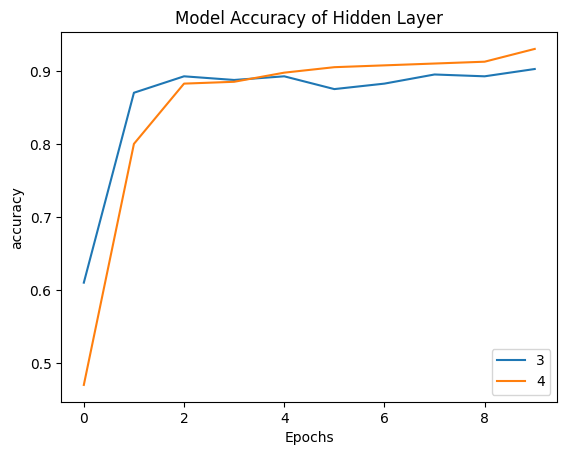

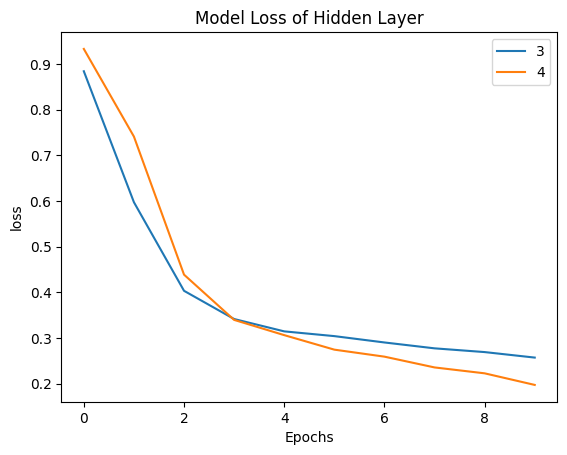

In [ ]:
# summarize history for accuracy
plt.plot(history07.history['accuracy'])
plt.plot(history08.history['accuracy'])
plt.title('Model Accuracy of Hidden Layer')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['3','4'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history07.history['loss'])
plt.plot(history08.history['loss'])
plt.title('Model Loss of Hidden Layer')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['3','4'], loc='upper right')
plt.show()

In [ ]:
#BATCH SIZE TEST

In [ ]:
#Experiment9
#model09 architecture is using batch size = 2
model09 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model09.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history09 = model09.fit(X_train, y_train, epochs=10, batch_size=2, validation_split=0.2)
test_loss, test_acc = model09.evaluate(X_test,  y_test)

test_loss, test_acc = model09.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.9257 - accuracy: 0.6450 - val_loss: 0.7902 - val_accuracy: 0.8700
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6329 - accuracy: 0.8650 - val_loss: 0.6538 - val_accuracy: 0.8500
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5020 - accuracy: 0.8725 - val_loss: 0.5498 - val_accuracy: 0.8600
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8900 - val_loss: 0.4609 - val_accuracy: 0.8700
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8825 - val_loss: 0.4067 - val_accuracy: 0.8600
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8800 - val_loss: 0.3836 - val_accuracy: 0.8500
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8950 - val_loss: 0.3538 - val_accuracy: 0.8600
Epoch 

In [ ]:
#Experiment10
#model10 architecture is using batch size = 3
model10 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model10.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history10 = model10.fit(X_train, y_train, epochs=10, batch_size=3, validation_split=0.2)
test_loss, test_acc = model10.evaluate(X_test,  y_test)

test_loss, test_acc = model10.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
134/134 [==============================] - 1s 3ms/step - loss: 0.8784 - accuracy: 0.5900 - val_loss: 0.9060 - val_accuracy: 0.8300
Epoch 2/10
134/134 [==============================] - 0s 2ms/step - loss: 0.7581 - accuracy: 0.8200 - val_loss: 0.7415 - val_accuracy: 0.8700
Epoch 3/10
134/134 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.8850 - val_loss: 0.5949 - val_accuracy: 0.8700
Epoch 4/10
134/134 [==============================] - 0s 2ms/step - loss: 0.4620 - accuracy: 0.8825 - val_loss: 0.4963 - val_accuracy: 0.8700
Epoch 5/10
134/134 [==============================] - 0s 2ms/step - loss: 0.3945 - accuracy: 0.8800 - val_loss: 0.4385 - val_accuracy: 0.8700
Epoch 6/10
134/134 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8775 - val_loss: 0.4173 - val_accuracy: 0.8700
Epoch 7/10
134/134 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8850 - val_loss: 0.3731 - val_accuracy: 0.8800
Epoch 

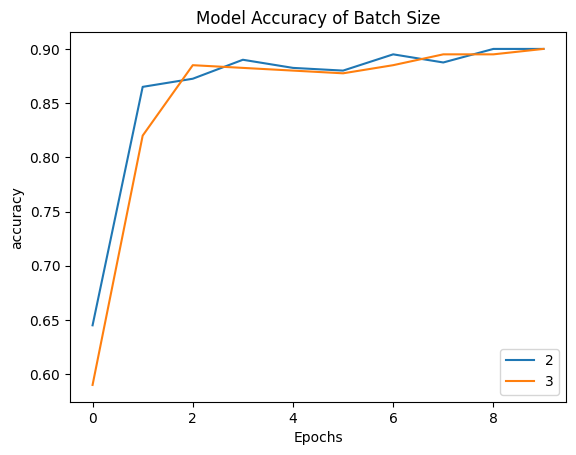

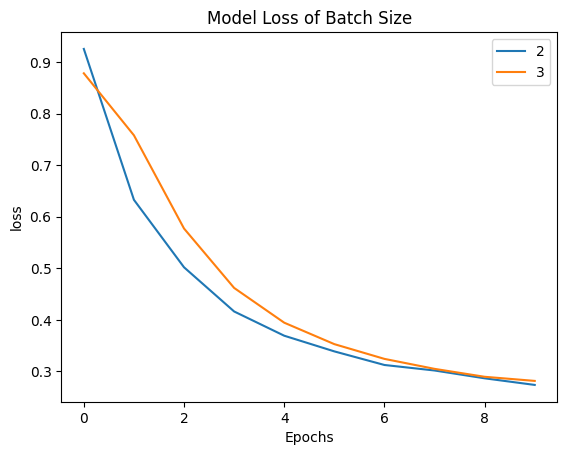

In [ ]:
# summarize history for accuracy
plt.plot(history09.history['accuracy'])
plt.plot(history10.history['accuracy'])
plt.title('Model Accuracy of Batch Size')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['2','3'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history09.history['loss'])
plt.plot(history10.history['loss'])
plt.title('Model Loss of Batch Size')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['2','3'], loc='upper right')
plt.show()

In [ ]:
#2nd Optimizer - adamax

In [ ]:
#Activation Function test

In [ ]:
#Experiment 11
#model11 architecture is using tanh activation
model11 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(20, activation='tanh'),

  tf.keras.layers.Dense(3)
])
model11.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history11 = model11.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model11.evaluate(X_test,  y_test)

test_loss, test_acc = model11.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 1s 2ms/step - loss: 0.7457 - accuracy: 0.7550 - val_loss: 0.6800 - val_accuracy: 0.8500
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5264 - accuracy: 0.8600 - val_loss: 0.5323 - val_accuracy: 0.8600
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4226 - accuracy: 0.8700 - val_loss: 0.4553 - val_accuracy: 0.8600
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3734 - accuracy: 0.8800 - val_loss: 0.4137 - val_accuracy: 0.8600
Epoch 5/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8850 - val_loss: 0.3850 - val_accuracy: 0.8500
Epoch 6/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3230 - accuracy: 0.8925 - val_loss: 0.3681 - val_accuracy: 0.8500
Epoch 7/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3098 - accuracy: 0.8850 - val_loss: 0.3454 - val_accuracy: 0.8600
Epoch 

In [ ]:
#Experiment 12
#model12 architecture is using ELU activation
model12 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='ELU'),
  tf.keras.layers.Dense(20, activation='ELU'),

  tf.keras.layers.Dense(3)
])
model12.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history12 = model12.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model12.evaluate(X_test,  y_test)

test_loss, test_acc = model12.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 2ms/step - loss: 0.7229 - accuracy: 0.7475 - val_loss: 0.5978 - val_accuracy: 0.8400
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4336 - accuracy: 0.8800 - val_loss: 0.4778 - val_accuracy: 0.8600
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3630 - accuracy: 0.8775 - val_loss: 0.4134 - val_accuracy: 0.8600
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3289 - accuracy: 0.8800 - val_loss: 0.3800 - val_accuracy: 0.8600
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3101 - accuracy: 0.8800 - val_loss: 0.3558 - val_accuracy: 0.8700
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2975 - accuracy: 0.8825 - val_loss: 0.3365 - val_accuracy: 0.8700
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2883 - accuracy: 0.8875 - val_loss: 0.3339 - val_accuracy: 0.8700
Epoch 

In [ ]:
#Experiment 13
#model11 architecture is using relu activation
model13 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),

  tf.keras.layers.Dense(3)
])
model13.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history13 = model13.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model13.evaluate(X_test,  y_test)

test_loss, test_acc = model13.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 1s 2ms/step - loss: 0.7748 - accuracy: 0.6950 - val_loss: 0.7323 - val_accuracy: 0.8200
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5976 - accuracy: 0.8400 - val_loss: 0.6141 - val_accuracy: 0.8700
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4931 - accuracy: 0.8775 - val_loss: 0.5229 - val_accuracy: 0.8600
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4295 - accuracy: 0.8875 - val_loss: 0.4704 - val_accuracy: 0.8600
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3808 - accuracy: 0.8875 - val_loss: 0.4336 - val_accuracy: 0.8600
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3476 - accuracy: 0.8950 - val_loss: 0.3980 - val_accuracy: 0.8700
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3327 - accuracy: 0.8925 - val_loss: 0.3749 - val_accuracy: 0.8600
Epoch 

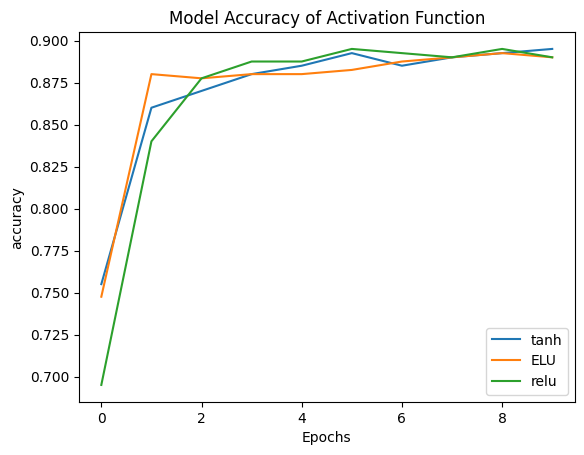

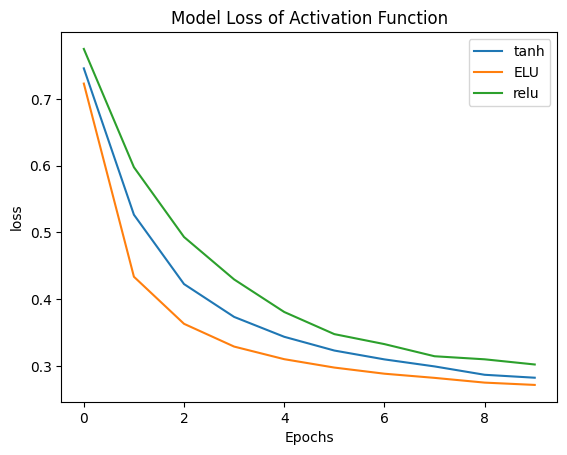

In [ ]:
plt.plot(history11.history['accuracy'])
plt.plot(history12.history['accuracy'])
plt.plot(history13.history['accuracy'])
plt.title('Model Accuracy of Activation Function')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['tanh','ELU','relu'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history11.history['loss'])
plt.plot(history12.history['loss'])
plt.plot(history13.history['loss'])
plt.title('Model Loss of Activation Function')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['tanh','ELU','relu'], loc='upper right')
plt.show()

In [ ]:
#EPOCH TEST

In [ ]:
#Experiment14
#model14 architecture is using epoch = 10
model14 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model14.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history14 = model14.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model14.evaluate(X_test,  y_test)

test_loss, test_acc = model14.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 4ms/step - loss: 0.8568 - accuracy: 0.6575 - val_loss: 0.8466 - val_accuracy: 0.7800
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.6765 - accuracy: 0.8550 - val_loss: 0.7078 - val_accuracy: 0.8400
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.8800 - val_loss: 0.6140 - val_accuracy: 0.8700
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4793 - accuracy: 0.8925 - val_loss: 0.5537 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4310 - accuracy: 0.8950 - val_loss: 0.5070 - val_accuracy: 0.8800
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3985 - accuracy: 0.8850 - val_loss: 0.4730 - val_accuracy: 0.8800
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3747 - accuracy: 0.8900 - val_loss: 0.4490 - val_accuracy: 0.8800
Epoch 

In [ ]:
#Experiment15
#model15 architecture is using epoch = 20
model15 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model15.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history15 = model15.fit(X_train, y_train, epochs=20, batch_size=1, validation_split=0.2)
test_loss, test_acc = model15.evaluate(X_test,  y_test)

test_loss, test_acc = model15.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/20
400/400 [==============================] - 2s 3ms/step - loss: 0.9303 - accuracy: 0.5450 - val_loss: 0.8626 - val_accuracy: 0.7100
Epoch 2/20
400/400 [==============================] - 1s 3ms/step - loss: 0.6963 - accuracy: 0.8100 - val_loss: 0.7202 - val_accuracy: 0.8000
Epoch 3/20
400/400 [==============================] - 1s 3ms/step - loss: 0.5686 - accuracy: 0.8575 - val_loss: 0.6283 - val_accuracy: 0.8300
Epoch 4/20
400/400 [==============================] - 1s 2ms/step - loss: 0.4906 - accuracy: 0.8725 - val_loss: 0.5643 - val_accuracy: 0.8400
Epoch 5/20
400/400 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8825 - val_loss: 0.5115 - val_accuracy: 0.8600
Epoch 6/20
400/400 [==============================] - 1s 2ms/step - loss: 0.4059 - accuracy: 0.8875 - val_loss: 0.4775 - val_accuracy: 0.8600
Epoch 7/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8900 - val_loss: 0.4547 - val_accuracy: 0.8700
Epoch 

In [ ]:
#Experiment16
#model16 architecture is using epoch = 30
model16 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model16.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history16 = model16.fit(X_train, y_train, epochs=30, batch_size=1, validation_split=0.2)
test_loss, test_acc = model16.evaluate(X_test,  y_test)

test_loss, test_acc = model16.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/30
400/400 [==============================] - 2s 2ms/step - loss: 0.9962 - accuracy: 0.4900 - val_loss: 0.9316 - val_accuracy: 0.6800
Epoch 2/30
400/400 [==============================] - 1s 2ms/step - loss: 0.8173 - accuracy: 0.8100 - val_loss: 0.8475 - val_accuracy: 0.8000
Epoch 3/30
400/400 [==============================] - 1s 2ms/step - loss: 0.7069 - accuracy: 0.8575 - val_loss: 0.7525 - val_accuracy: 0.8500
Epoch 4/30
400/400 [==============================] - 1s 2ms/step - loss: 0.6073 - accuracy: 0.8575 - val_loss: 0.6668 - val_accuracy: 0.8600
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 0.5312 - accuracy: 0.8825 - val_loss: 0.6009 - val_accuracy: 0.8600
Epoch 6/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4767 - accuracy: 0.8775 - val_loss: 0.5491 - val_accuracy: 0.8700
Epoch 7/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4363 - accuracy: 0.8800 - val_loss: 0.5100 - val_accuracy: 0.8600
Epoch 

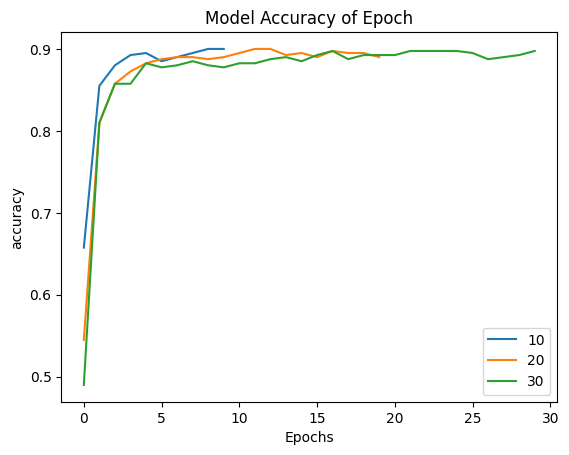

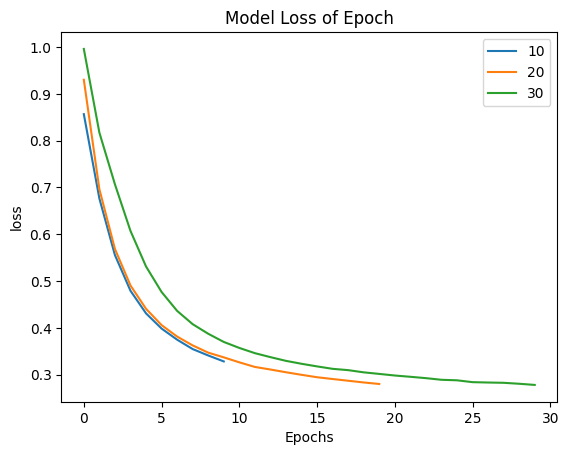

In [ ]:
# summarize history for accuracy
plt.plot(history14.history['accuracy'])
plt.plot(history15.history['accuracy'])
plt.plot(history16.history['accuracy'])
plt.title('Model Accuracy of Epoch')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['10','20','30'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history14.history['loss'])
plt.plot(history15.history['loss'])
plt.plot(history16.history['loss'])
plt.title('Model Loss of Epoch')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['10','20','30'], loc='upper right')
plt.show()

In [ ]:
#HIDDEN LAYER TEST

In [ ]:
#Experiment17
#model17 architecture is using hidden layer = 3
model17 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model17.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history17 = model17.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model17.evaluate(X_test,  y_test)

test_loss, test_acc = model17.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 2ms/step - loss: 0.9031 - accuracy: 0.6325 - val_loss: 0.9183 - val_accuracy: 0.7100
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.7983 - accuracy: 0.8075 - val_loss: 0.8201 - val_accuracy: 0.7900
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.6461 - accuracy: 0.8750 - val_loss: 0.6596 - val_accuracy: 0.8700
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5145 - accuracy: 0.8850 - val_loss: 0.5566 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4380 - accuracy: 0.8900 - val_loss: 0.4948 - val_accuracy: 0.8700
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8800 - val_loss: 0.4506 - val_accuracy: 0.8700
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3671 - accuracy: 0.8825 - val_loss: 0.4233 - val_accuracy: 0.8700
Epoch 

In [ ]:
#Experiment18
#model18 architecture is using hidden layer = 4
model18 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),
  tf.keras.layers.Dense(20, activation='sigmoid'),
  tf.keras.layers.Dense(20, activation='sigmoid'),


  tf.keras.layers.Dense(3)
])
model18.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history18 = model18.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model18.evaluate(X_test,  y_test)

test_loss, test_acc = model18.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 2ms/step - loss: 1.0966 - accuracy: 0.3775 - val_loss: 0.9625 - val_accuracy: 0.4700
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.8980 - accuracy: 0.4975 - val_loss: 0.9475 - val_accuracy: 0.4300
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.8513 - accuracy: 0.6875 - val_loss: 0.8876 - val_accuracy: 0.6300
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.7426 - accuracy: 0.8200 - val_loss: 0.7502 - val_accuracy: 0.8300
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5922 - accuracy: 0.8700 - val_loss: 0.6186 - val_accuracy: 0.8500
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4867 - accuracy: 0.8825 - val_loss: 0.5329 - val_accuracy: 0.8600
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4200 - accuracy: 0.8800 - val_loss: 0.4764 - val_accuracy: 0.8600
Epoch 

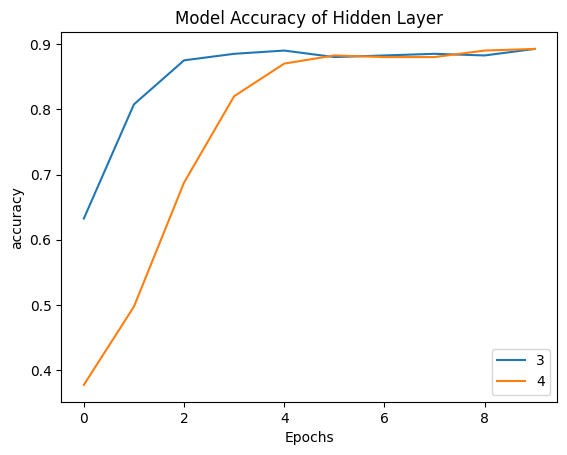

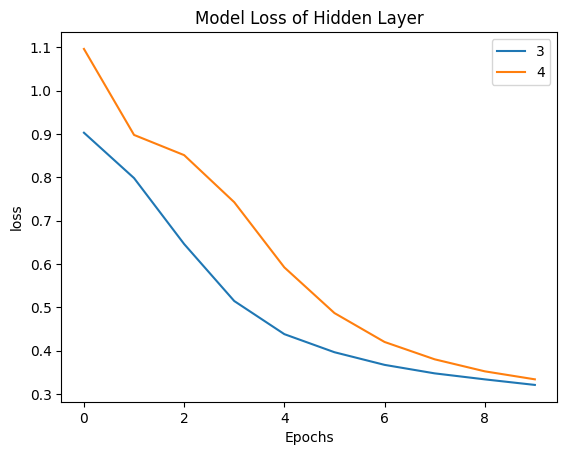

In [ ]:
# summarize history for accuracy
plt.plot(history17.history['accuracy'])
plt.plot(history18.history['accuracy'])
plt.title('Model Accuracy of Hidden Layer')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['3','4'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history17.history['loss'])
plt.plot(history18.history['loss'])
plt.title('Model Loss of Hidden Layer')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['3','4'], loc='upper right')
plt.show()

In [ ]:
#BATCH SIZE TEST

In [ ]:
#Experiment19
#model19 architecture is using batch size = 2
model19 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model19.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history19 = model19.fit(X_train, y_train, epochs=10, batch_size=2, validation_split=0.2)
test_loss, test_acc = model19.evaluate(X_test,  y_test)

test_loss, test_acc = model19.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 1.0585 - accuracy: 0.4250 - val_loss: 0.9460 - val_accuracy: 0.5400
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.8370 - accuracy: 0.7500 - val_loss: 0.8714 - val_accuracy: 0.8300
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.7544 - accuracy: 0.8425 - val_loss: 0.8165 - val_accuracy: 0.8200
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.8350 - val_loss: 0.7575 - val_accuracy: 0.8200
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6251 - accuracy: 0.8600 - val_loss: 0.6975 - val_accuracy: 0.8500
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.8775 - val_loss: 0.6431 - val_accuracy: 0.8500
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.8850 - val_loss: 0.5988 - val_accuracy: 0.8700
Epoch 

In [ ]:
#Experiment20
#model20 architecture is using batch size = 3
model20 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model20.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history20 = model20.fit(X_train, y_train, epochs=10, batch_size=3, validation_split=0.2)
test_loss, test_acc = model20.evaluate(X_test,  y_test)

test_loss, test_acc = model20.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
134/134 [==============================] - 1s 3ms/step - loss: 0.9080 - accuracy: 0.5350 - val_loss: 0.9261 - val_accuracy: 0.5800
Epoch 2/10
134/134 [==============================] - 0s 2ms/step - loss: 0.8299 - accuracy: 0.6975 - val_loss: 0.8770 - val_accuracy: 0.7000
Epoch 3/10
134/134 [==============================] - 0s 2ms/step - loss: 0.7719 - accuracy: 0.7975 - val_loss: 0.8282 - val_accuracy: 0.8000
Epoch 4/10
134/134 [==============================] - 0s 2ms/step - loss: 0.7133 - accuracy: 0.8425 - val_loss: 0.7723 - val_accuracy: 0.8400
Epoch 5/10
134/134 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.8675 - val_loss: 0.7142 - val_accuracy: 0.8500
Epoch 6/10
134/134 [==============================] - 0s 2ms/step - loss: 0.5937 - accuracy: 0.8750 - val_loss: 0.6586 - val_accuracy: 0.8500
Epoch 7/10
134/134 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.8875 - val_loss: 0.6037 - val_accuracy: 0.8600
Epoch 

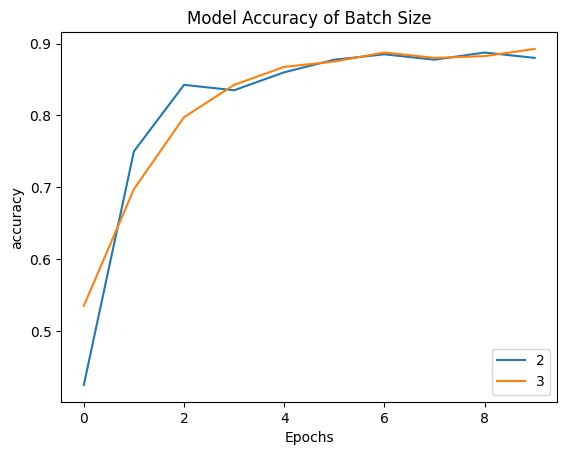

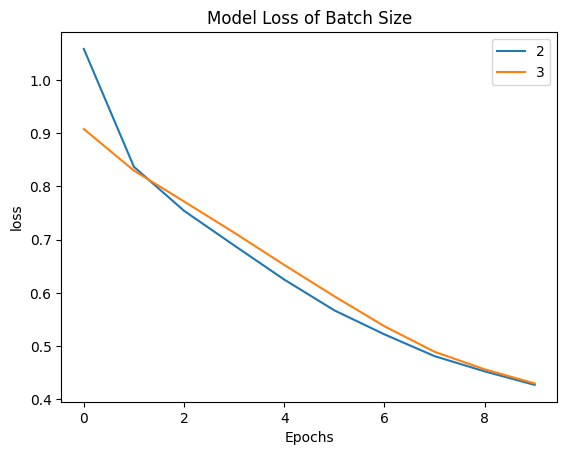

In [ ]:
# summarize history for accuracy
plt.plot(history19.history['accuracy'])
plt.plot(history20.history['accuracy'])
plt.title('Model Accuracy of Batch Size')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['2','3'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history19.history['loss'])
plt.plot(history20.history['loss'])
plt.title('Model Loss of Batch Size')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['2','3'], loc='upper right')
plt.show()

In [ ]:
#EXPERIMENT 20-30
#3nd Optimizer - SGD

In [ ]:
#Activation Function test

In [ ]:
#Experiment 21
#model21 architecture is using tanh activation
model21 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(20, activation='tanh'),

  tf.keras.layers.Dense(3)
])
model21.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history21 = model21.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model21.evaluate(X_test,  y_test)

test_loss, test_acc = model21.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 3ms/step - loss: 0.4589 - accuracy: 0.8300 - val_loss: 0.3649 - val_accuracy: 0.8700
Epoch 2/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3313 - accuracy: 0.8750 - val_loss: 0.3942 - val_accuracy: 0.8600
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2933 - accuracy: 0.8975 - val_loss: 0.3936 - val_accuracy: 0.8400
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2629 - accuracy: 0.8975 - val_loss: 0.3155 - val_accuracy: 0.8600
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.8925 - val_loss: 0.2435 - val_accuracy: 0.9000
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2405 - accuracy: 0.9000 - val_loss: 0.3090 - val_accuracy: 0.8700
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2167 - accuracy: 0.9025 - val_loss: 0.3869 - val_accuracy: 0.8200
Epoch 

In [ ]:
#Experiment 22
#model22 architecture is using ELU activation
model22 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='ELU'),
  tf.keras.layers.Dense(20, activation='ELU'),

  tf.keras.layers.Dense(3)
])
model22.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history22 = model22.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model22.evaluate(X_test,  y_test)

test_loss, test_acc = model22.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5064 - accuracy: 0.8250 - val_loss: 0.3804 - val_accuracy: 0.8700
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8800 - val_loss: 0.4671 - val_accuracy: 0.8100
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3228 - accuracy: 0.8775 - val_loss: 0.4306 - val_accuracy: 0.8500
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2958 - accuracy: 0.8925 - val_loss: 0.3003 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 2s 5ms/step - loss: 0.2659 - accuracy: 0.8975 - val_loss: 0.3019 - val_accuracy: 0.8600
Epoch 6/10
400/400 [==============================] - 1s 3ms/step - loss: 0.2721 - accuracy: 0.8925 - val_loss: 0.2615 - val_accuracy: 0.8700
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2454 - accuracy: 0.8975 - val_loss: 0.2807 - val_accuracy: 0.8700
Epoch 

In [ ]:
#Experiment 23
#model23 architecture is using relu activation
model23 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),

  tf.keras.layers.Dense(3)
])
model23.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history23 = model23.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model23.evaluate(X_test,  y_test)

test_loss, test_acc = model23.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5947 - accuracy: 0.7925 - val_loss: 0.3906 - val_accuracy: 0.8700
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8825 - val_loss: 0.3281 - val_accuracy: 0.8700
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2846 - accuracy: 0.8900 - val_loss: 0.3264 - val_accuracy: 0.8600
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2695 - accuracy: 0.8875 - val_loss: 0.2888 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2435 - accuracy: 0.8975 - val_loss: 0.3548 - val_accuracy: 0.8800
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2266 - accuracy: 0.9150 - val_loss: 0.2857 - val_accuracy: 0.8600
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2038 - accuracy: 0.9100 - val_loss: 0.3375 - val_accuracy: 0.8600
Epoch 

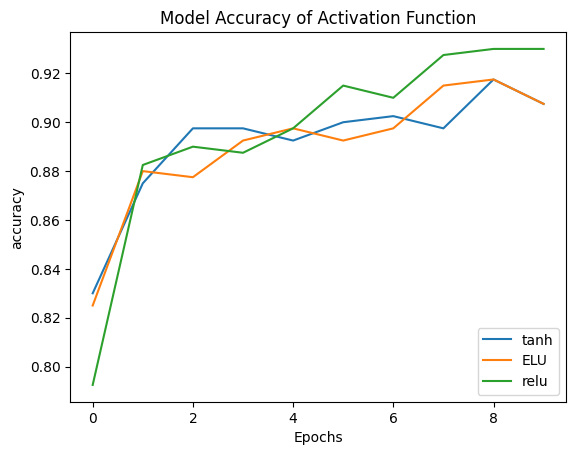

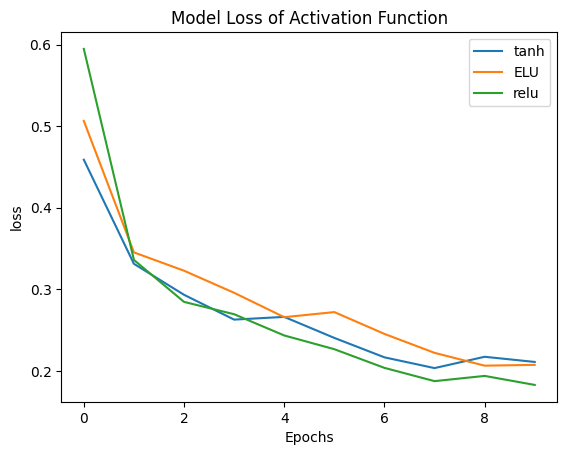

In [ ]:
plt.plot(history21.history['accuracy'])
plt.plot(history22.history['accuracy'])
plt.plot(history23.history['accuracy'])
plt.title('Model Accuracy of Activation Function')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['tanh','ELU','relu'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history21.history['loss'])
plt.plot(history22.history['loss'])
plt.plot(history23.history['loss'])
plt.title('Model Loss of Activation Function')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['tanh','ELU','relu'], loc='upper right')
plt.show()

In [ ]:
#EPOCH TEST

In [ ]:
#Experiment24

In [ ]:
#model24 architecture is using epoch = 10
model24 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model24.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history24 = model24.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model24.evaluate(X_test,  y_test)

test_loss, test_acc = model24.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
400/400 [==============================] - 1s 2ms/step - loss: 0.8547 - accuracy: 0.6450 - val_loss: 0.7323 - val_accuracy: 0.8500
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5485 - accuracy: 0.8575 - val_loss: 0.5273 - val_accuracy: 0.8500
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4088 - accuracy: 0.8775 - val_loss: 0.4209 - val_accuracy: 0.8600
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3507 - accuracy: 0.8850 - val_loss: 0.3732 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3237 - accuracy: 0.8875 - val_loss: 0.3373 - val_accuracy: 0.8600
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3135 - accuracy: 0.8850 - val_loss: 0.3255 - val_accuracy: 0.8700
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2959 - accuracy: 0.8975 - val_loss: 0.3080 - val_accuracy: 0.8700
Epoch 

In [ ]:
#Experiment25
#model25 architecture is using epoch = 20
model25 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model25.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history25 = model25.fit(X_train, y_train, epochs=20, batch_size=1, validation_split=0.2)
test_loss, test_acc = model25.evaluate(X_test,  y_test)

test_loss, test_acc = model25.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/20
400/400 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.8225 - val_loss: 0.6027 - val_accuracy: 0.8500
Epoch 2/20
400/400 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.8700 - val_loss: 0.4515 - val_accuracy: 0.8700
Epoch 3/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3559 - accuracy: 0.8775 - val_loss: 0.3882 - val_accuracy: 0.8500
Epoch 4/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3289 - accuracy: 0.8800 - val_loss: 0.3395 - val_accuracy: 0.8700
Epoch 5/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3158 - accuracy: 0.8850 - val_loss: 0.3347 - val_accuracy: 0.8700
Epoch 6/20
400/400 [==============================] - 1s 2ms/step - loss: 0.2978 - accuracy: 0.8950 - val_loss: 0.3040 - val_accuracy: 0.8700
Epoch 7/20
400/400 [==============================] - 1s 2ms/step - loss: 0.3003 - accuracy: 0.8750 - val_loss: 0.2928 - val_accuracy: 0.8700
Epoch 

In [ ]:
#Experiment26
#model26 architecture is using epoch = 30
model26 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model26.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history26 = model26.fit(X_train, y_train, epochs=30, batch_size=1, validation_split=0.2)
test_loss, test_acc = model26.evaluate(X_test,  y_test)

test_loss, test_acc = model26.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/30
400/400 [==============================] - 1s 2ms/step - loss: 0.8015 - accuracy: 0.6875 - val_loss: 0.7173 - val_accuracy: 0.8000
Epoch 2/30
400/400 [==============================] - 1s 2ms/step - loss: 0.5092 - accuracy: 0.8750 - val_loss: 0.4727 - val_accuracy: 0.8700
Epoch 3/30
400/400 [==============================] - 1s 2ms/step - loss: 0.3679 - accuracy: 0.8875 - val_loss: 0.4122 - val_accuracy: 0.8600
Epoch 4/30
400/400 [==============================] - 1s 2ms/step - loss: 0.3214 - accuracy: 0.9025 - val_loss: 0.3557 - val_accuracy: 0.8600
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 0.3027 - accuracy: 0.8950 - val_loss: 0.3144 - val_accuracy: 0.8600
Epoch 6/30
400/400 [==============================] - 1s 2ms/step - loss: 0.2800 - accuracy: 0.8950 - val_loss: 0.3231 - val_accuracy: 0.8700
Epoch 7/30
400/400 [==============================] - 1s 3ms/step - loss: 0.2607 - accuracy: 0.9075 - val_loss: 0.2879 - val_accuracy: 0.8700
Epoch 

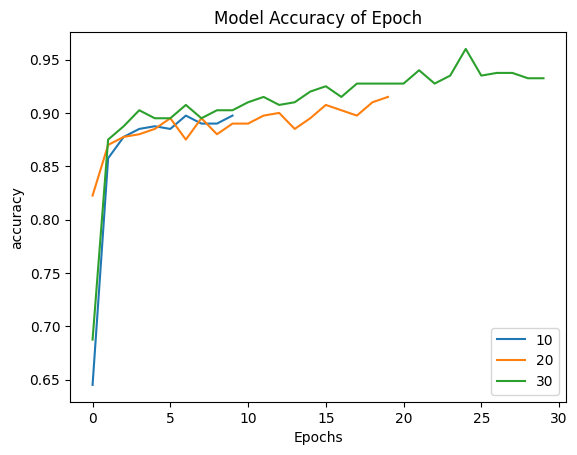

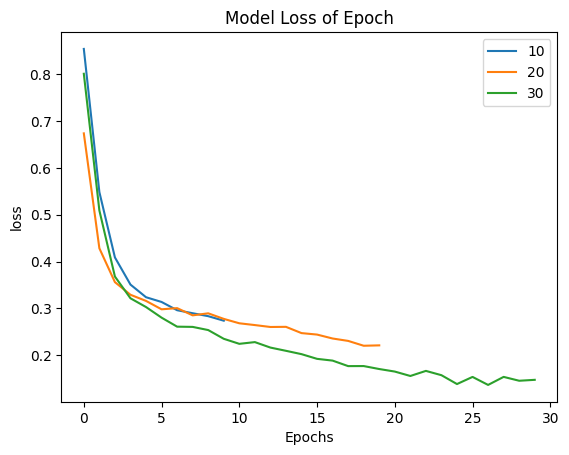

In [ ]:
# summarize history for accuracy
plt.plot(history24.history['accuracy'])
plt.plot(history25.history['accuracy'])
plt.plot(history26.history['accuracy'])
plt.title('Model Accuracy of Epoch')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['10','20','30'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history24.history['loss'])
plt.plot(history25.history['loss'])
plt.plot(history26.history['loss'])
plt.title('Model Loss of Epoch')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['10','20','30'], loc='upper right')
plt.show()

In [ ]:
#HIDDEN LAYER TEST

In [ ]:
#Experiment27
#model27 architecture is using hidden layer = 3
model27 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model27.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history27 = model27.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model27.evaluate(X_test,  y_test)

test_loss, test_acc = model27.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
400/400 [==============================] - 1s 2ms/step - loss: 0.8998 - accuracy: 0.4925 - val_loss: 0.9426 - val_accuracy: 0.7900
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.8457 - accuracy: 0.6200 - val_loss: 0.8860 - val_accuracy: 0.7300
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.7487 - accuracy: 0.8000 - val_loss: 0.7815 - val_accuracy: 0.6800
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5894 - accuracy: 0.8650 - val_loss: 0.5906 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4523 - accuracy: 0.8750 - val_loss: 0.4874 - val_accuracy: 0.8600
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3844 - accuracy: 0.8850 - val_loss: 0.4161 - val_accuracy: 0.8500
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3505 - accuracy: 0.8800 - val_loss: 0.4134 - val_accuracy: 0.8700
Epoch 

In [ ]:
#Experiment28
#model28 architecture is using hidden layer = 4
model28 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),
  tf.keras.layers.Dense(20, activation='sigmoid'),
  tf.keras.layers.Dense(20, activation='sigmoid'),


  tf.keras.layers.Dense(3)
])
model28.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history28 = model28.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model28.evaluate(X_test,  y_test)

test_loss, test_acc = model28.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
400/400 [==============================] - 2s 2ms/step - loss: 0.9025 - accuracy: 0.4575 - val_loss: 0.9772 - val_accuracy: 0.4200
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.8975 - accuracy: 0.4875 - val_loss: 0.9666 - val_accuracy: 0.4700
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.8987 - accuracy: 0.4700 - val_loss: 0.9603 - val_accuracy: 0.4700
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.8872 - accuracy: 0.5100 - val_loss: 0.9634 - val_accuracy: 0.5800
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.8773 - accuracy: 0.5450 - val_loss: 0.9402 - val_accuracy: 0.5800
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.8591 - accuracy: 0.5975 - val_loss: 0.9274 - val_accuracy: 0.5300
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.8250 - accuracy: 0.6700 - val_loss: 0.8871 - val_accuracy: 0.7600
Epoch 

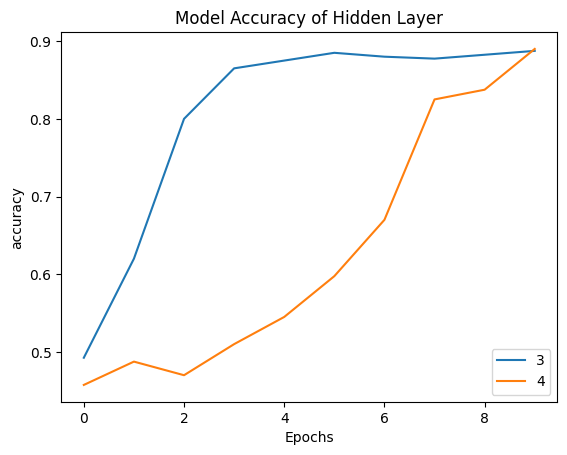

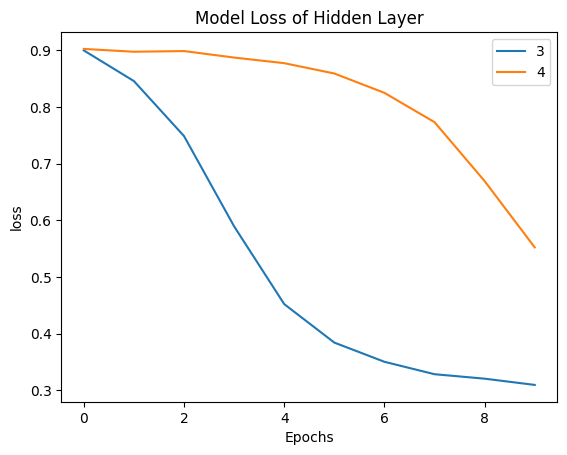

In [ ]:
# summarize history for accuracy
plt.plot(history27.history['accuracy'])
plt.plot(history28.history['accuracy'])
plt.title('Model Accuracy of Hidden Layer')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['3','4'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history27.history['loss'])
plt.plot(history28.history['loss'])
plt.title('Model Loss of Hidden Layer')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['3','4'], loc='upper right')
plt.show()


In [ ]:
#BATCH SIZE TEST

In [ ]:
#Experiment29
#model29 architecture is using batch size = 2
model29 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model29.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history29 = model29.fit(X_train, y_train, epochs=10, batch_size=2, validation_split=0.2)
test_loss, test_acc = model29.evaluate(X_test,  y_test)

test_loss, test_acc = model29.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.8621 - accuracy: 0.6400 - val_loss: 0.8066 - val_accuracy: 0.7700
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6431 - accuracy: 0.8675 - val_loss: 0.6526 - val_accuracy: 0.8700
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5037 - accuracy: 0.8825 - val_loss: 0.5525 - val_accuracy: 0.8700
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4209 - accuracy: 0.8800 - val_loss: 0.4680 - val_accuracy: 0.8700
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3771 - accuracy: 0.8875 - val_loss: 0.4239 - val_accuracy: 0.8700
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3463 - accuracy: 0.8900 - val_loss: 0.3899 - val_accuracy: 0.8700
Epoch 7/10
200/200 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8925 - val_loss: 0.3742 - val_accuracy: 0.8700
Epoch 

In [ ]:
#Experiment30
#model30 architecture is using batch size = 3
model30 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model30.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history30 = model30.fit(X_train, y_train, epochs=10, batch_size=3, validation_split=0.2)
test_loss, test_acc = model30.evaluate(X_test,  y_test)

test_loss, test_acc = model30.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
134/134 [==============================] - 1s 3ms/step - loss: 0.9232 - accuracy: 0.6300 - val_loss: 0.8793 - val_accuracy: 0.7000
Epoch 2/10
134/134 [==============================] - 0s 2ms/step - loss: 0.7590 - accuracy: 0.8000 - val_loss: 0.8071 - val_accuracy: 0.7300
Epoch 3/10
134/134 [==============================] - 0s 2ms/step - loss: 0.6643 - accuracy: 0.8375 - val_loss: 0.6983 - val_accuracy: 0.8600
Epoch 4/10
134/134 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.8750 - val_loss: 0.6208 - val_accuracy: 0.8600
Epoch 5/10
134/134 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.8850 - val_loss: 0.5585 - val_accuracy: 0.8600
Epoch 6/10
134/134 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.8825 - val_loss: 0.5100 - val_accuracy: 0.8600
Epoch 7/10
134/134 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8775 - val_loss: 0.4777 - val_accuracy: 0.8500
Epoch 

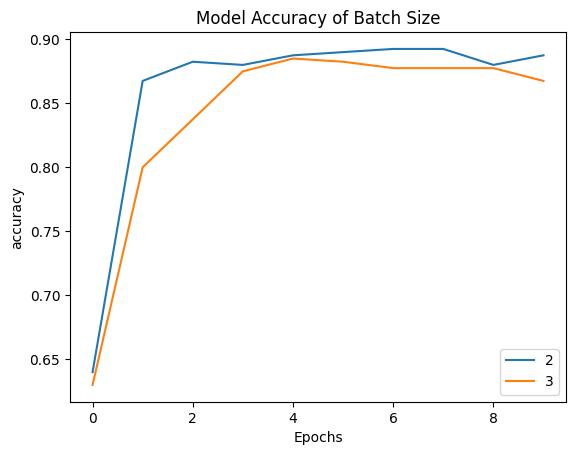

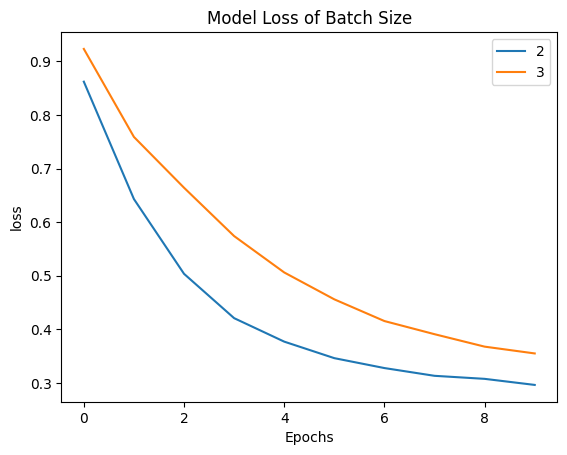

In [ ]:
# summarize history for accuracy
plt.plot(history29.history['accuracy'])
plt.plot(history30.history['accuracy'])
plt.title('Model Accuracy of Batch Size')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['2','3'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history29.history['loss'])
plt.plot(history30.history['loss'])
plt.title('Model Loss of Batch Size')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['2','3'], loc='upper right')
plt.show()

In [ ]:
#4th Optimizer - Nadam

In [ ]:
#ACTIVATION FUNCTION TEST

In [ ]:
#Experiment 31
#model31 architecture is using sigmoid activation
model31 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dense(20, activation='tanh'),

  tf.keras.layers.Dense(3)
])
model31.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history31 = model31.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model31.evaluate(X_test,  y_test)

test_loss, test_acc = model31.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
400/400 [==============================] - 3s 3ms/step - loss: 0.6512 - accuracy: 0.7775 - val_loss: 0.4725 - val_accuracy: 0.8600
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3712 - accuracy: 0.8750 - val_loss: 0.3451 - val_accuracy: 0.8700
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2914 - accuracy: 0.8975 - val_loss: 0.2829 - val_accuracy: 0.8800
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2498 - accuracy: 0.9125 - val_loss: 0.2702 - val_accuracy: 0.8800
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2302 - accuracy: 0.9050 - val_loss: 0.2747 - val_accuracy: 0.8600
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2063 - accuracy: 0.9050 - val_loss: 0.2330 - val_accuracy: 0.8800
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.1968 - accuracy: 0.9100 - val_loss: 0.2024 - val_accuracy: 0.9000
Epoch 

In [ ]:
#Experiment32
#model32 architecture is using ELU activation
model32 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='ELU'),
  tf.keras.layers.Dense(20, activation='ELU'),

  tf.keras.layers.Dense(3)
])
model32.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history32 = model32.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model32.evaluate(X_test,  y_test)

test_loss, test_acc = model32.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 4s 5ms/step - loss: 0.6876 - accuracy: 0.7450 - val_loss: 0.5237 - val_accuracy: 0.8600
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3893 - accuracy: 0.8725 - val_loss: 0.3862 - val_accuracy: 0.8700
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3024 - accuracy: 0.8900 - val_loss: 0.3230 - val_accuracy: 0.8600
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2804 - accuracy: 0.8875 - val_loss: 0.2831 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2511 - accuracy: 0.9000 - val_loss: 0.2571 - val_accuracy: 0.8700
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2441 - accuracy: 0.9000 - val_loss: 0.2523 - val_accuracy: 0.8700
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2270 - accuracy: 0.9100 - val_loss: 0.2777 - val_accuracy: 0.8700
Epoch 

In [ ]:
#Experiment33
#model33 architecture is using relu activation
model33 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),

  tf.keras.layers.Dense(3)
])
model33.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history33 = model33.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model33.evaluate(X_test,  y_test)

test_loss, test_acc = model33.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 3s 4ms/step - loss: 0.7680 - accuracy: 0.6925 - val_loss: 0.5605 - val_accuracy: 0.8500
Epoch 2/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3953 - accuracy: 0.8800 - val_loss: 0.4331 - val_accuracy: 0.8600
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8825 - val_loss: 0.3610 - val_accuracy: 0.8700
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3066 - accuracy: 0.8900 - val_loss: 0.3415 - val_accuracy: 0.8600
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2873 - accuracy: 0.8900 - val_loss: 0.3051 - val_accuracy: 0.8700
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2821 - accuracy: 0.9050 - val_loss: 0.2994 - val_accuracy: 0.8600
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2512 - accuracy: 0.9025 - val_loss: 0.2885 - val_accuracy: 0.9000
Epoch 

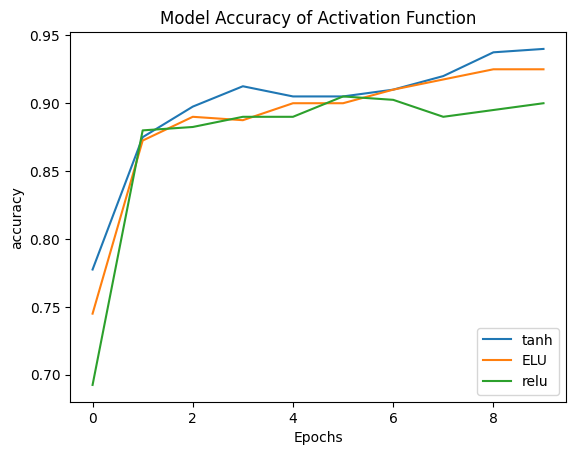

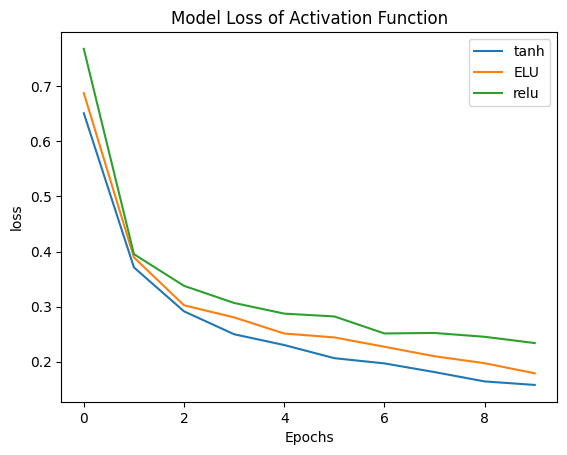

In [ ]:
# summarize history for accuracy
plt.plot(history31.history['accuracy'])
plt.plot(history32.history['accuracy'])
plt.plot(history33.history['accuracy'])
plt.title('Model Accuracy of Activation Function')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['tanh','ELU','relu'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history31.history['loss'])
plt.plot(history32.history['loss'])
plt.plot(history33.history['loss'])
plt.title('Model Loss of Activation Function')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['tanh','ELU','relu'], loc='upper right')
plt.show()

In [ ]:
#EPOCH TEST

In [ ]:
#Experiment34
#model34 architecture is using epoch = 10
model34 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model34.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history34 = model34.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model34.evaluate(X_test,  y_test)

test_loss, test_acc = model34.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 3ms/step - loss: 0.6433 - accuracy: 0.8475 - val_loss: 0.5941 - val_accuracy: 0.8700
Epoch 2/10
400/400 [==============================] - 1s 4ms/step - loss: 0.4211 - accuracy: 0.8850 - val_loss: 0.4280 - val_accuracy: 0.8700
Epoch 3/10
400/400 [==============================] - 1s 4ms/step - loss: 0.3414 - accuracy: 0.8975 - val_loss: 0.3624 - val_accuracy: 0.8700
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3054 - accuracy: 0.8925 - val_loss: 0.3278 - val_accuracy: 0.8800
Epoch 5/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2755 - accuracy: 0.9000 - val_loss: 0.3056 - val_accuracy: 0.8700
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2661 - accuracy: 0.9000 - val_loss: 0.3019 - val_accuracy: 0.8700
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2475 - accuracy: 0.9050 - val_loss: 0.2916 - val_accuracy: 0.8700
Epoch 

In [ ]:
#Experiment35
#model35 architecture is using epoch = 20
model35 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model35.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history35 = model35.fit(X_train, y_train, epochs=20, batch_size=1, validation_split=0.2)
test_loss, test_acc = model35.evaluate(X_test,  y_test)

test_loss, test_acc = model35.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/20
400/400 [==============================] - 2s 3ms/step - loss: 0.8698 - accuracy: 0.6900 - val_loss: 0.6642 - val_accuracy: 0.8600
Epoch 2/20
400/400 [==============================] - 1s 2ms/step - loss: 0.5179 - accuracy: 0.8850 - val_loss: 0.5157 - val_accuracy: 0.8600
Epoch 3/20
400/400 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8950 - val_loss: 0.4308 - val_accuracy: 0.8800
Epoch 4/20
400/400 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8950 - val_loss: 0.3650 - val_accuracy: 0.8800
Epoch 5/20
400/400 [==============================] - 1s 3ms/step - loss: 0.3119 - accuracy: 0.8950 - val_loss: 0.3274 - val_accuracy: 0.8800
Epoch 6/20
400/400 [==============================] - 1s 2ms/step - loss: 0.2839 - accuracy: 0.9075 - val_loss: 0.3355 - val_accuracy: 0.8600
Epoch 7/20
400/400 [==============================] - 1s 2ms/step - loss: 0.2616 - accuracy: 0.9100 - val_loss: 0.2771 - val_accuracy: 0.8800
Epoch 

In [ ]:
#Experiment36
#model36 architecture is using epoch = 30
model36 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model36.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history36 = model36.fit(X_train, y_train, epochs=30, batch_size=1, validation_split=0.2)
test_loss, test_acc = model36.evaluate(X_test,  y_test)

test_loss, test_acc = model36.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/30
400/400 [==============================] - 2s 2ms/step - loss: 0.9398 - accuracy: 0.5900 - val_loss: 0.8409 - val_accuracy: 0.8400
Epoch 2/30
400/400 [==============================] - 1s 2ms/step - loss: 0.6475 - accuracy: 0.8475 - val_loss: 0.6219 - val_accuracy: 0.8600
Epoch 3/30
400/400 [==============================] - 1s 2ms/step - loss: 0.4455 - accuracy: 0.8800 - val_loss: 0.5069 - val_accuracy: 0.8400
Epoch 4/30
400/400 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8775 - val_loss: 0.4024 - val_accuracy: 0.8700
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 0.3257 - accuracy: 0.8950 - val_loss: 0.3777 - val_accuracy: 0.8600
Epoch 6/30
400/400 [==============================] - 1s 2ms/step - loss: 0.3091 - accuracy: 0.8825 - val_loss: 0.3430 - val_accuracy: 0.8700
Epoch 7/30
400/400 [==============================] - 1s 2ms/step - loss: 0.2922 - accuracy: 0.8925 - val_loss: 0.3209 - val_accuracy: 0.8700
Epoch 

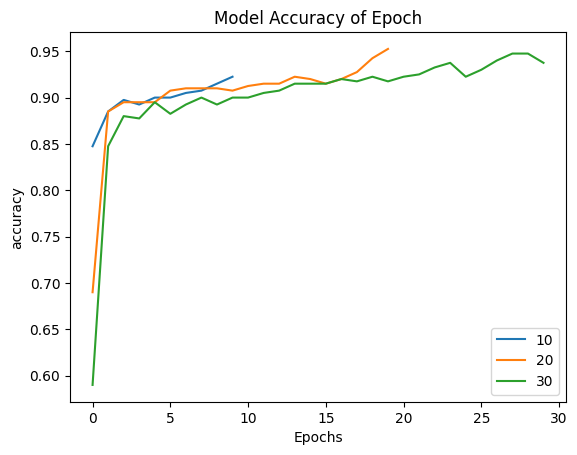

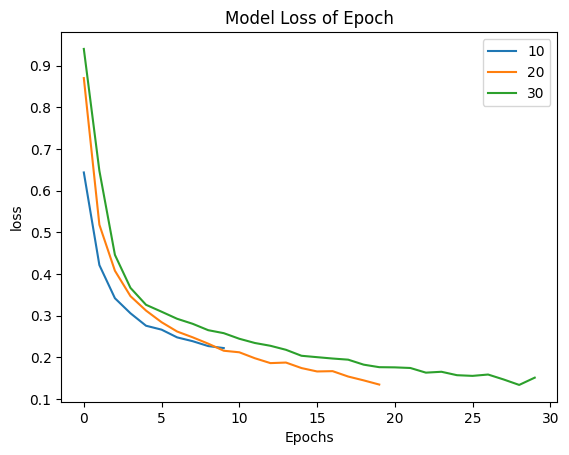

In [ ]:
# summarize history for accuracy
plt.plot(history34.history['accuracy'])
plt.plot(history35.history['accuracy'])
plt.plot(history36.history['accuracy'])
plt.title('Model Accuracy of Epoch')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['10','20','30'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history34.history['loss'])
plt.plot(history35.history['loss'])
plt.plot(history36.history['loss'])
plt.title('Model Loss of Epoch')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['10','20','30'], loc='upper right')
plt.show()

In [ ]:
#HIDDEN LAYER TEST

In [ ]:
#Experiment37
#model37 architecture is using hidden layer = 3
model37 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model37.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history37 = model37.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model37.evaluate(X_test,  y_test)

test_loss, test_acc = model37.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 2s 3ms/step - loss: 0.8169 - accuracy: 0.7200 - val_loss: 0.7487 - val_accuracy: 0.8800
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.5227 - accuracy: 0.8850 - val_loss: 0.4811 - val_accuracy: 0.8700
Epoch 3/10
400/400 [==============================] - 1s 3ms/step - loss: 0.3668 - accuracy: 0.8925 - val_loss: 0.3895 - val_accuracy: 0.8600
Epoch 4/10
400/400 [==============================] - 2s 4ms/step - loss: 0.3126 - accuracy: 0.8900 - val_loss: 0.3266 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 1s 3ms/step - loss: 0.2755 - accuracy: 0.9000 - val_loss: 0.2846 - val_accuracy: 0.8800
Epoch 6/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2568 - accuracy: 0.9050 - val_loss: 0.2885 - val_accuracy: 0.8700
Epoch 7/10
400/400 [==============================] - 1s 2ms/step - loss: 0.2334 - accuracy: 0.9100 - val_loss: 0.2506 - val_accuracy: 0.8800
Epoch 

In [ ]:
#Experiment38
#model38 architecture is using hidden layer = 4
model38 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),
  tf.keras.layers.Dense(20, activation='sigmoid'),
   tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model38.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history38 = model38.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)
test_loss, test_acc = model38.evaluate(X_test,  y_test)

test_loss, test_acc = model38.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
400/400 [==============================] - 3s 3ms/step - loss: 0.8829 - accuracy: 0.5600 - val_loss: 0.9160 - val_accuracy: 0.6600
Epoch 2/10
400/400 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.8275 - val_loss: 0.6574 - val_accuracy: 0.8600
Epoch 3/10
400/400 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.8850 - val_loss: 0.4312 - val_accuracy: 0.8600
Epoch 4/10
400/400 [==============================] - 1s 2ms/step - loss: 0.3532 - accuracy: 0.8925 - val_loss: 0.3935 - val_accuracy: 0.8700
Epoch 5/10
400/400 [==============================] - 1s 4ms/step - loss: 0.3173 - accuracy: 0.8975 - val_loss: 0.4089 - val_accuracy: 0.8700
Epoch 6/10
400/400 [==============================] - 2s 4ms/step - loss: 0.3161 - accuracy: 0.8900 - val_loss: 0.3256 - val_accuracy: 0.8600
Epoch 7/10
400/400 [==============================] - 1s 3ms/step - loss: 0.2887 - accuracy: 0.8875 - val_loss: 0.3000 - val_accuracy: 0.8700
Epoch 

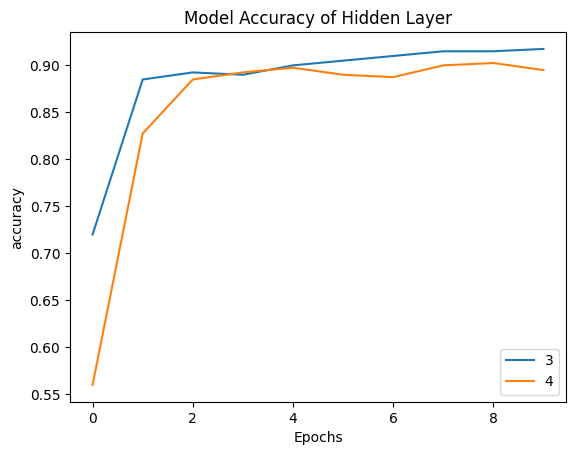

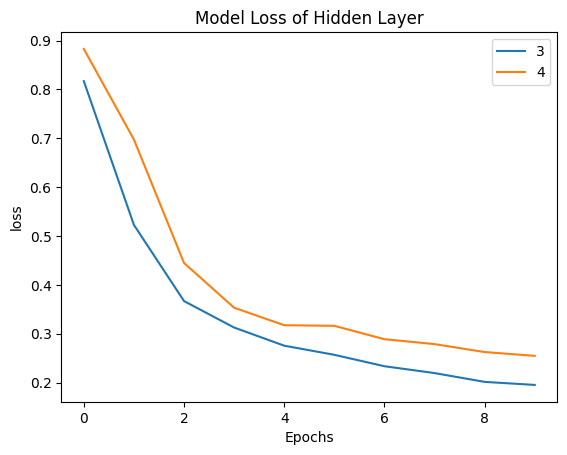

In [ ]:
# summarize history for accuracy
plt.plot(history37.history['accuracy'])
plt.plot(history38.history['accuracy'])
plt.title('Model Accuracy of Hidden Layer')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['3','4'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history37.history['loss'])
plt.plot(history38.history['loss'])
plt.title('Model Loss of Hidden Layer')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['3','4'], loc='upper right')
plt.show()

In [ ]:
#BATCH SIZE TEST

In [ ]:
#Experiment39
#model39 architecture is using batch size = 2
model39 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model39.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history39 = model39.fit(X_train, y_train, epochs=10, batch_size=2, validation_split=0.2)
test_loss, test_acc = model39.evaluate(X_test,  y_test)

test_loss, test_acc = model39.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

Epoch 1/10
200/200 [==============================] - 2s 3ms/step - loss: 0.8507 - accuracy: 0.6950 - val_loss: 0.7683 - val_accuracy: 0.7900
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5805 - accuracy: 0.8575 - val_loss: 0.5744 - val_accuracy: 0.8500
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4364 - accuracy: 0.8775 - val_loss: 0.4807 - val_accuracy: 0.8600
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8775 - val_loss: 0.4310 - val_accuracy: 0.8700
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8850 - val_loss: 0.3946 - val_accuracy: 0.8700
Epoch 6/10
200/200 [==============================] - 1s 2ms/step - loss: 0.3157 - accuracy: 0.8875 - val_loss: 0.3525 - val_accuracy: 0.8700
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8900 - val_loss: 0.3335 - val_accuracy: 0.8700
Epoch 

In [ ]:
#Experiment40
#model40 architecture is using batch size = 3
model40 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(4,)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='sigmoid'),

  tf.keras.layers.Dense(3)
])
model40.compile(optimizer='Nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history40 = model40.fit(X_train, y_train, epochs=10, batch_size=3, validation_split=0.2)
test_loss, test_acc = model40.evaluate(X_test,  y_test)

test_loss, test_acc = model40.evaluate(X_test,  y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Epoch 1/10
134/134 [==============================] - 2s 4ms/step - loss: 0.9111 - accuracy: 0.6125 - val_loss: 0.7945 - val_accuracy: 0.7700
Epoch 2/10
134/134 [==============================] - 0s 2ms/step - loss: 0.5879 - accuracy: 0.8700 - val_loss: 0.6105 - val_accuracy: 0.8300
Epoch 3/10
134/134 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8900 - val_loss: 0.4989 - val_accuracy: 0.8600
Epoch 4/10
134/134 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8950 - val_loss: 0.4406 - val_accuracy: 0.8600
Epoch 5/10
134/134 [==============================] - 0s 2ms/step - loss: 0.3478 - accuracy: 0.8975 - val_loss: 0.4005 - val_accuracy: 0.8700
Epoch 6/10
134/134 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8925 - val_loss: 0.3780 - val_accuracy: 0.8700
Epoch 7/10
134/134 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8850 - val_loss: 0.3582 - val_accuracy: 0.8700
Epoch 

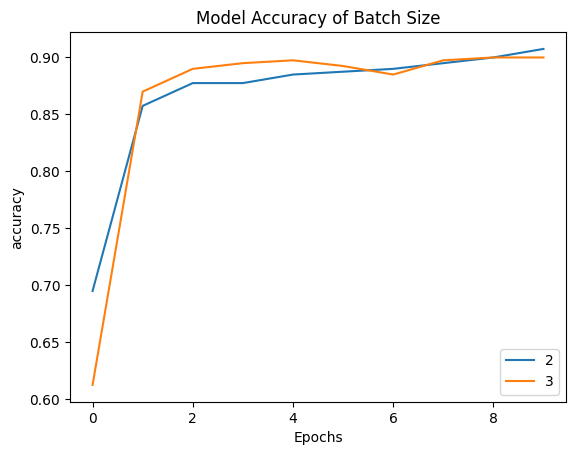

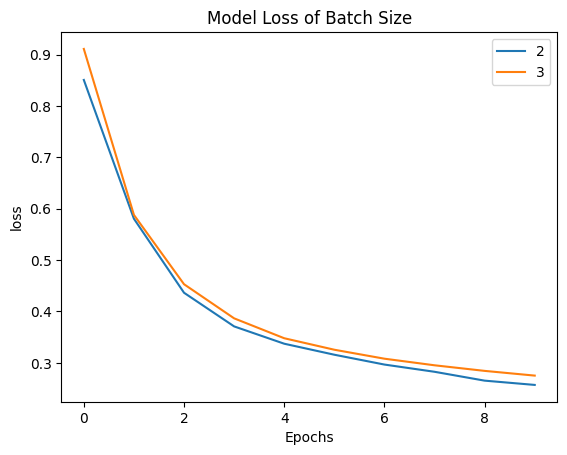

In [ ]:
# summarize history for accuracy
plt.plot(history39.history['accuracy'])
plt.plot(history40.history['accuracy'])
plt.title('Model Accuracy of Batch Size')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['2','3'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history39.history['loss'])
plt.plot(history40.history['loss'])
plt.title('Model Loss of Batch Size')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['2','3'], loc='upper right')
plt.show()